# Task 1 Prediction employee attrition 
- Author : Dur e yashfeen
- Date : 2025-02-01


## 📖 The Story of Employee Attrition 🚀

Once upon a time in a bustling corporate world 🏢, employees joined companies with dreams of growth and success 🌟. Some thrived, while others faced challenges that led them to leave 🚶‍♂️💼.

Emma, a hardworking data analyst 📊, loved her job but struggled with long commutes 🚗💨 and work-life balance ⚖️. Meanwhile, her colleague, Jake, felt undervalued despite his dedication 💪. One day, HR decided to analyze why employees like Emma and Jake were leaving, using machine learning 🤖 and data science 📈.

With insights from employee data, the company discovered key factors affecting attrition—salary, job satisfaction, commute distance, and career growth 📉💰. They implemented better policies, flexible work hours ⏳, and employee engagement programs 🎉. Soon, employee satisfaction soared 🚀, and attrition rates dropped! 

This is how data-driven decisions transformed the workplace, ensuring a brighter future for employees and companies alike! 🌈💡


- `Objective` : Build a classification model to predict whether an employee will leave a company
based on HR data and derive actionable retention strategies.

## Metadata 
- Uncover the factors that lead to employee attrition and explore important questions such as` ***show me a breakdown of distance from home by job role and attrition***  or ***compare average monthly income by education and attrition***. This is a fictional data set created by IBM data scientists.

### Step 1: Importing Necessary Libraries 

To begin our journey, we must equip ourselves with the right tools 🛠️. We import essential libraries like pandas, numpy, and machine learning models to help analyze and predict employee attrition 📊🔍.


### Step 1: Importing  Necessary Libraries 

In [10]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [29]:
import warnings
warnings.filterwarnings('ignore')

### Step 2: Load the dataset or gather data 

In [30]:
# loading the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()# displays the first 5 rows of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 1️⃣ Exploratory Data Analysis (EDA)

### Step 3: Summary Statistics

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [32]:
df.columns  # checking columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [33]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [34]:
df.shape

(1470, 35)

#### Step 4: Excluding Useless Columns

In [35]:
df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'], inplace=True)

### Step 5: Exploring or Preprocessing the data 

In [36]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [37]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [38]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

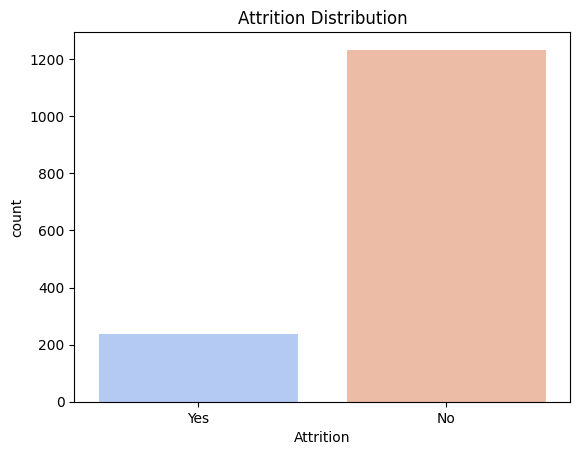

In [39]:
# checking the class imblance of attrition 
sns.countplot(x=df['Attrition'], palette="coolwarm")
plt.title('Attrition Distribution')
plt.show()

### Step.6 Feature Correlation 

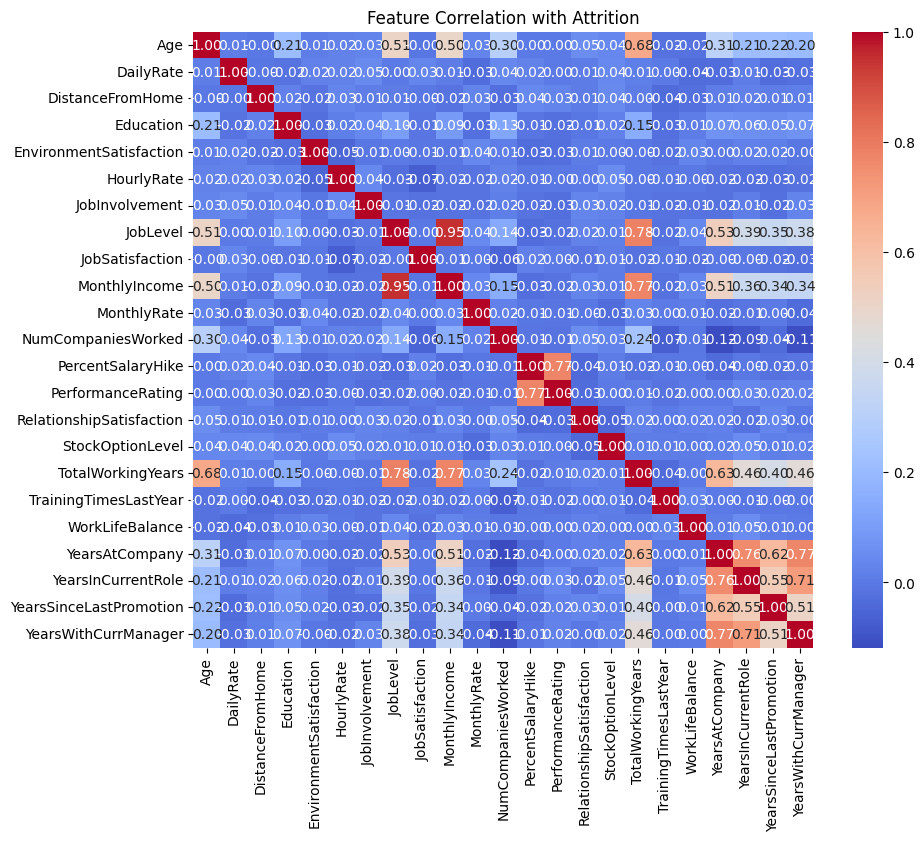

In [40]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])

# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Attrition')
plt.show()

### Step.7 Key Visualization


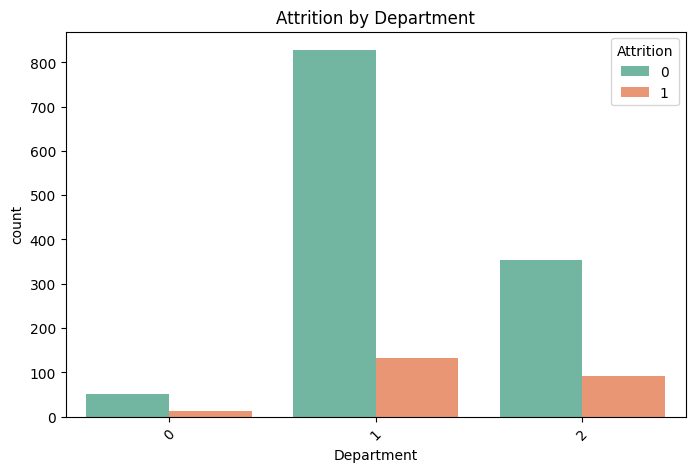

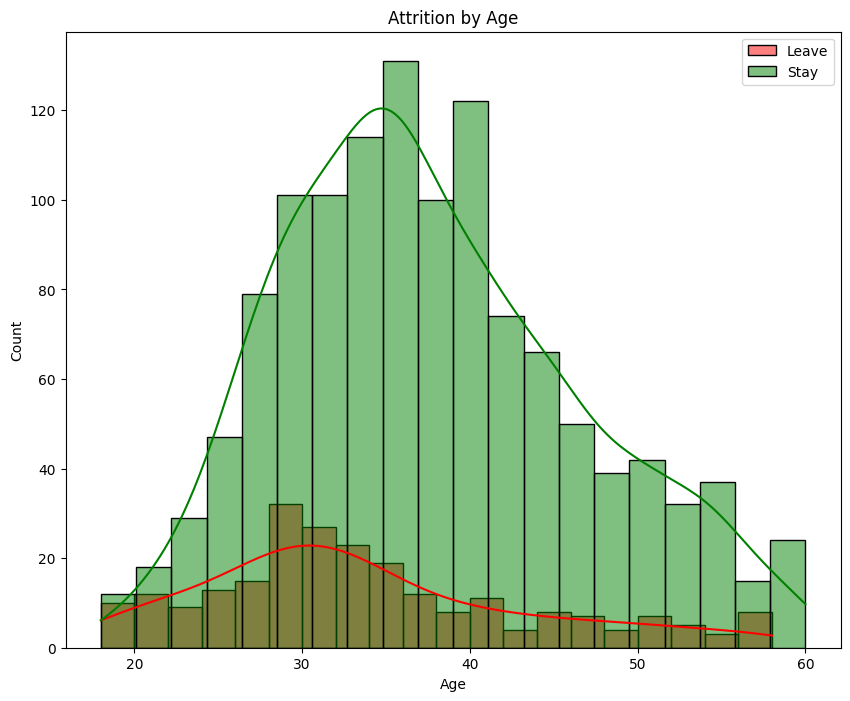

In [54]:
# Attrition by department
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Department'], hue=df['Attrition'], palette="Set2")
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

# Attrition by Age group
plt.figure(figsize=(10, 8))
sns.histplot(df[df["Attrition"] == 1]["Age"], bins=20, kde=True, color="red", label="Leave")
sns.histplot(df[df["Attrition"] == 0]["Age"], bins=20, kde=True, color="green", label="Stay")
plt.title('Attrition by Age')
plt.legend()
plt.show()  # Add parentheses to plt.show


## 2️⃣ Data Preprocessing & Feature Engineering

### Step:8 Label Encoding 

In [42]:
# # encode the cetagorical variables using for loop where object and cetagory data type are given 
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])


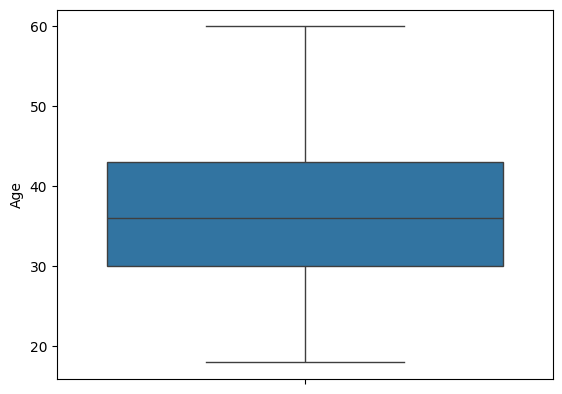

In [43]:
# check the outlier 
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['Age'])
plt.show()

### Step.9   Seprate the features x and the target \ labels y

In [44]:
# x  and y columns
x = df.drop(columns=['Attrition'])
y = df['Attrition']

### Step.11 Split Train Test Data

In [45]:
# train test split the data
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### Step.12 Scaling the data for better performance

In [46]:
# lets normalize the data for better performance
from sklearn.preprocessing import MinMaxScaler
# create a MinMaxScaler object
scaler = MinMaxScaler()
# fit and transform the data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Step.13  hyper perameter tuning

In [52]:
# lets do the hyper perameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

## 3️⃣ Model Training

### Step.14  Call & Train the Model 

In [48]:
# call the model
model = LogisticRegression(max_iter= 100, random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


# Now create random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

y_pred = model.predict(x_test)

## 4️⃣ Model Evaluation

### Step.15 Evaluate the Model 

In [53]:
# evaluate the model 
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred)}')

Accuracy: 0.891156462585034
Recall: 0.2564102564102564
[[252   3]
 [ 29  10]]
Precision: 0.7692307692307693
F1 Score: 0.38461538461538464
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       255
           1       0.77      0.26      0.38        39

    accuracy                           0.89       294
   macro avg       0.83      0.62      0.66       294
weighted avg       0.88      0.89      0.87       294



In [50]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.891156462585034
Recall: 0.2564102564102564


## 5️⃣ Explainability using SHAP

### Step.15 Lime Technique for RandomForest Classifier Explannation 

### Step.16 Shap technique for linear Regresion 

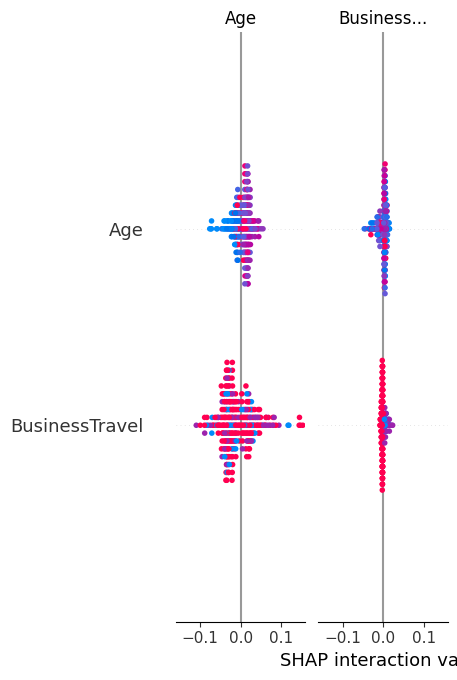

In [ ]:
import shap
# SHAP explanation
shap_explainer = shap.TreeExplainer(rfc)
shap_values = shap_explainer.shap_values(x_test)

# Select appropriate SHAP values for summary plot
if isinstance(shap_values, list) and len(shap_values) > 1:
    shap_values_to_plot = shap_values[1]  # For binary classification, use SHAP values of class 1
else:
    shap_values_to_plot = shap_values

# Summary plot for class 1
shap.summary_plot(shap_values_to_plot, x_test)

## 6️⃣ Actionable Insights for HR

## Findings from EDA:
>- Work-Life Balance: Employees with poor work-life balance are more likely to leave.
>- Job Role & Salary: Certain job roles experience higher attrition, possibly due to salary dissatisfaction.
>- Age Factor: Younger employees tend to leave more, suggesting career growth concerns.


### Recommendations for HR:
>- Improve Work-Life Balance → Flexible work options, reduced overtime.
>- Salary Adjustments → Competitive pay based on industry benchmarks.
>- Career Growth Opportunities → Mentorship programs & internal promotions.

### Conclusion 🎯💡

Thanks to data science and machine learning, our HR team can now identify and address employee attrition risks! By analyzing patterns, they create a happier, more productive workplace for everyone 🚀🎉. 

And so, Emma and Jake, along with many others, found better job satisfaction, work-life balance, and career growth—all thanks to the power of data! 🌟📊

---

The End 🎬😊
